In [35]:
import pandas as pd
import numpy as np

dataset=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Small_Cap\RAYMOND.csv")
price=dataset['Close Price']
returns=price.pct_change()
mean_return=returns.mean()
return_stdev=returns.std()
annual_returns=mean_return*252
annual_stdev=return_stdev*(252**0.5)
print(annual_returns,annual_stdev)



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stock1=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Small_Cap\RAYMOND.csv")
stock2=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Small_Cap\ASHOKA.csv")
stock3=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Large_Cap\LT.csv")
stock4=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Mid_Cap\VOLTAS.csv")
stock5=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Mid_Cap\GODREJIND.csv")
stocks={'stock1':stock1['Close Price'],'stock2':stock2['Close Price'],'stock3':stock3['Close Price'],'stock4':stock4['Close Price'],'stock5':stock5['Close Price']}
dataframe=pd.DataFrame(stocks)
dataframe.sort_index(inplace=True)
w=np.asarray([0.20,0.20,0.20,0.20,0.20])
returns=dataframe.pct_change()[1:]
daily_mean=returns.mean()
daily_cov=returns.cov()
nums_portfolios=25000
results=np.zeros((3,nums_portfolios))
portfolio_return=np.sum(daily_mean*w)*252
portfolio_stdev=np.sqrt(np.dot(w.T,np.dot(daily_cov,w)))*np.sqrt(252)
sharpe_ratio=portfolio_return/portfolio_stdev
for i in range(nums_portfolios):
    w=np.random.random(5)
    w /=np.sum(w)
    portfolio_return=np.sum(daily_mean*w)*252
    portfolio_stdev=np.sqrt(np.dot(w.T,np.dot(daily_cov,w)))*np.sqrt(252)
    results[0,i]=portfolio_return
    results[1,i]=portfolio_stdev
    results[2,i]=results[0,i]/results[1,i]
results_frame=pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
plt.scatter(results_frame['stdev'],results_frame['ret'],c=results_frame['sharpe'],cmap='RdYlBu')
plt.colorbar()
max_sharpe_ratio=results_frame.iloc[results_frame['sharpe'].idxmax()]
min_volatility=results_frame.iloc[results_frame['stdev'].idxmin()]
plt.xlabel('volatility')
plt.ylabel('returns')
plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='g',s=1000)
results_frame

0.07002051986509743 0.363834487471941


,ret,stdev,sharpe
0,0.024086,0.229386,0.105003
1,-0.095910,0.226200,-0.424003
2,-0.061470,0.220521,-0.278748
3,-0.037959,0.240082,-0.158109
4,-0.002026,0.218533,-0.009270
...,...,...,...
24995,-0.079336,0.232080,-0.341850
24996,0.018155,0.218613,0.083046
24997,-0.020662,0.216312,-0.095518
24998,-0.069234,0.221966,-0.311914


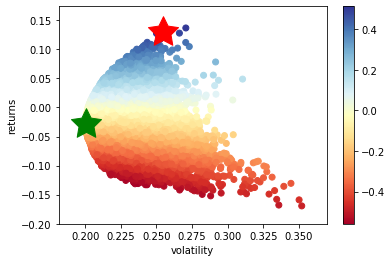